# META METHODS

In [7]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as cv
import sklearn  
import warnings
warnings.filterwarnings("ignore")
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


## Voting scheme

In [12]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=50

clf1 = MultinomialNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
    

Best Params fo Knn= {'n_neighbors': 9, 'weights': 'distance'} Accuracy= 0.6965471594043022
Accuracy: 0.769 [Naive Bayes]
Accuracy: 0.697 [Knn (3)]
Accuracy: 0.716 [Dec. Tree]


In [13]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))


Accuracy: 0.763 [Majority Voting]


In [14]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2.5,1.5,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.762 [Weighted Voting]


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

lb = []
# Usamos solo el valor 10 para n_estimators
nest = 10
scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest), X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
lb.append(scores.mean())

lb2 = []
print()
# Usamos solo el valor 10 para n_estimators y max_features=0.35
scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest, max_features=0.35), X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
lb2.append(scores.mean())

Accuracy: 0.682 [1]
Accuracy: 0.656 [2]
Accuracy: 0.706 [5]
Accuracy: 0.700 [10]
Accuracy: 0.714 [20]


KeyboardInterrupt: 

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.869 [1]
Accuracy: 0.875 [2]
Accuracy: 0.901 [5]
Accuracy: 0.929 [10]
Accuracy: 0.946 [20]
Accuracy: 0.940 [50]
Accuracy: 0.931 [100]
Accuracy: 0.934 [200]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.881 [1]
Accuracy: 0.858 [2]
Accuracy: 0.940 [5]
Accuracy: 0.960 [10]
Accuracy: 0.940 [20]
Accuracy: 0.946 [50]
Accuracy: 0.946 [100]
Accuracy: 0.946 [200]


## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.866 [1]
Accuracy: 0.867 [2]
Accuracy: 0.889 [5]
Accuracy: 0.906 [10]
Accuracy: 0.912 [20]
Accuracy: 0.938 [50]
Accuracy: 0.935 [100]
Accuracy: 0.935 [200]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.824 [1]
Accuracy: 0.898 [2]
Accuracy: 0.909 [5]
Accuracy: 0.909 [10]
Accuracy: 0.920 [20]
Accuracy: 0.934 [50]
Accuracy: 0.932 [100]
Accuracy: 0.938 [200]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.641 [1]
Accuracy: 0.641 [2]
Accuracy: 0.858 [5]
Accuracy: 0.886 [10]
Accuracy: 0.926 [20]
Accuracy: 0.935 [50]
Accuracy: 0.935 [100]
Accuracy: 0.946 [200]


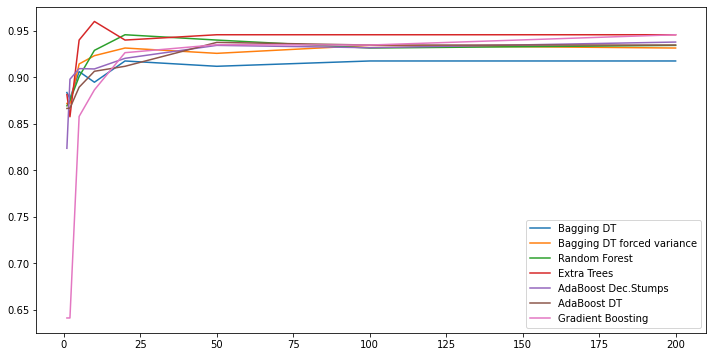

In [ ]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

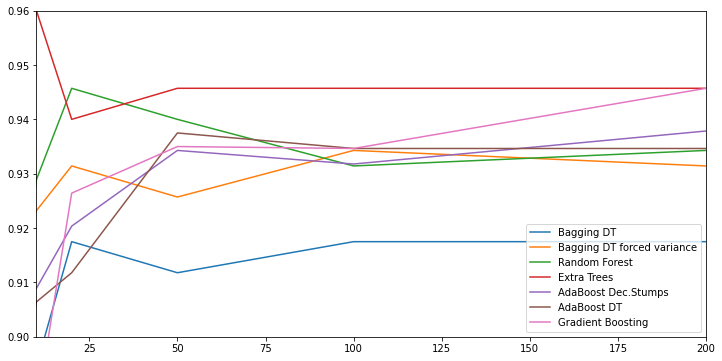

In [ ]:
plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20,50,100,200],lb,label="Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label="Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label="Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label="Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20,50,100,200],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')
plt.xlim(10,200)
plt.ylim(0.90,0.96)
plt.show()

## Feature Selection with Forests of trees

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X, y)
print(clf.feature_importances_)  


[0.02743269 0.         0.07838684 0.03656677 0.13866813 0.04120032
 0.0809811  0.03742688 0.01083312 0.01816042 0.00797138 0.01991839
 0.0082581  0.02589373 0.00999026 0.02507722 0.00901748 0.02420973
 0.00871821 0.01462055 0.02321926 0.0230003  0.01034209 0.03119317
 0.01193885 0.01701868 0.11387001 0.03175738 0.02504058 0.00677157
 0.02990876 0.01360025 0.02823214 0.01077566]


In [ ]:
from sklearn.feature_selection import SelectFromModel
warnings.filterwarnings("ignore", category=FutureWarning)
model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X=X, y=y, cv=cv, scoring='accuracy')))
print(np.mean(cross_val_score(KNeighborsClassifier(), X=X_new, y=y, cv=cv, scoring='accuracy')))

(351, 4)
0.837857142857143
0.895


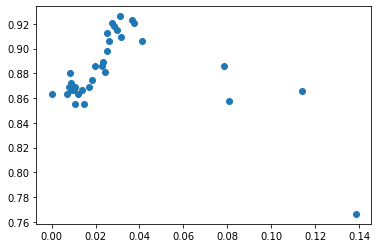

Best threshold:  0.031193171596859585


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])

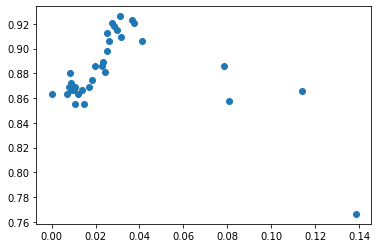

Best threshold:  0.031193171596859585


In [ ]:
thresholds=clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X)
    params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X, y)
    parval=clf2.best_params_
    clf3 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y, cv=cv, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])